In this notebook, we are going to use the data obtained using the quantum computer *ibm-kyiv* to verify that the following quantum network violates Bell inequality $S_2 \equiv \sqrt{|I_1|} + \sqrt{|I_2|} \leq 1$. In that way we can unveil nonlocal correlations in the network.

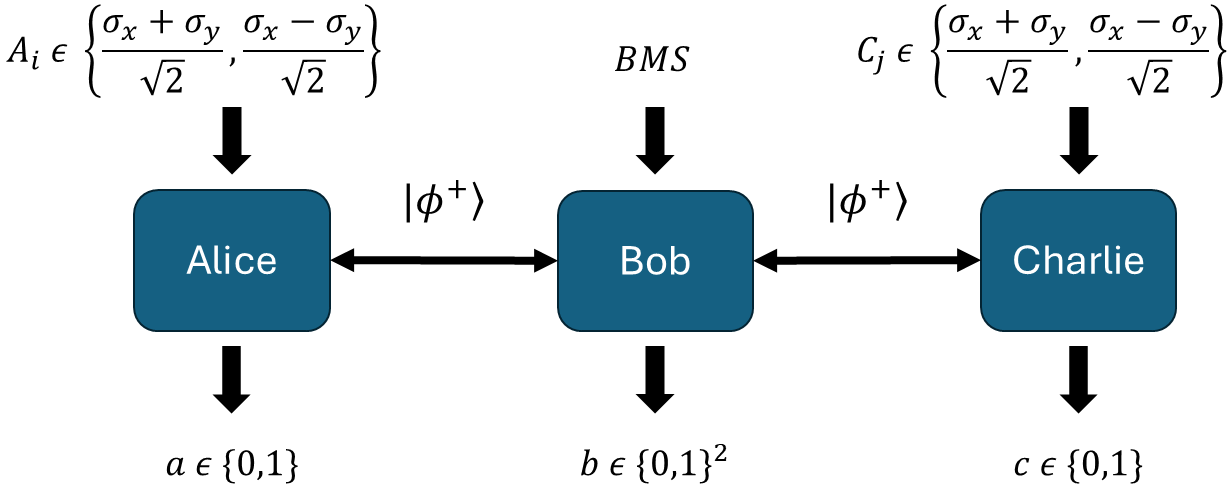

In [1]:
import numpy as np
import pandas as pd

In [2]:
def digit(num, n):
    """
    Extracts the nth digit from the right of a number.

    Args:
        num: The input number.
        n: The position of the digit to extract (1-indexed from the right).

    Returns:
        The extracted digit.
    """
    return (num // 10**n) % 10

We define the functions to calculate the correlators:

$$\langle A_i, B^1, C_j \rangle = \sum_{\substack{i,j \in \{0,1\} \\ b \in \{0,1\}^2}}(-1)^{b^1+a+c}p(a,b,c|A_i,C_j)$$

In [3]:
def Correlator1(array, shots):
    """
    Calculates the Correlator1 value for a given array of data and the total number of shots.

    Args:
        array: A 2D array where each row contains a measurement value and its corresponding shot count.
        shots: The total number of shots.

    Returns:
        The calculated Correlator1 value.
    """
    sum = 0
    for x in array:
        b1 = digit(x[0], 1)
        a1 = digit(x[0], 0)
        a2 = digit(x[0], 3)
        coeff = (-1)**(b1+a1+a2)
        sum += coeff * x[1]
    return sum * (1/shots)


$$\langle A_i, B^2, C_j \rangle = \sum_{\substack{i,j \in \{0,1\} \\ b \in \{0,1\}^2}}(-1)^{b^1\oplus b^2+a+c}p(a,b,c|A_i,C_j)$$

In [4]:
def Correlator2(array, shots):
    """
    Calculates the Correlator2 value for a given array of data and the total number of shots.

    Args:
        array: A 2D array where each row contains a measurement value and its corresponding shot count.
        shots: The total number of shots.

    Returns:
        The calculated Correlator2 value.
    """
    sum = 0
    for x in array:
        b1 = digit(x[0], 2)
        b2 = digit(x[0], 1)
        a1 = digit(x[0], 0)
        a2 = digit(x[0], 3)
        coeff = (-1)**(((b1+b2+1)%2)+a1+a2)
        sum += coeff * x[1]
    return sum * (1/shots)


We read the CSV files that contain the data obtained from the quantum computer. The format is the following:

"Measurement outcome","Frequency"\
"0000","4710" \
"0001","9969" \
"0010","8353" ... 

We have four CSV files, each corresponding to the outcomes obtained for the four possible configurations of measurements Alice and Charlie can choose:

StarBSM00_kyiv.csv : $A_0=C_0=\frac{\sigma_x +\sigma_y}{\sqrt{2}}$  

StarBSM01_kyiv.csv : $A_0=\frac{\sigma_x +\sigma_y}{\sqrt{2}}$, $C_1=\frac{\sigma_x -\sigma_y}{\sqrt{2}}$ 

StarBSM10_kyiv.csv : $A_1=\frac{\sigma_x -\sigma_y}{\sqrt{2}}$, $C_0=\frac{\sigma_x +\sigma_y}{\sqrt{2}}$ 

StarBSM11_kyiv.csv : $A_1=C_1=\frac{\sigma_x -\sigma_y}{\sqrt{2}}$

In [5]:
#read the data corresponding to measuremnt A_0 y C_0
df00 = pd.read_csv("StarBSM00_kyiv.csv")
strBsm00 = df00.to_numpy()


#read the data corresponding to measuremnt A_0 y C_1
df01 = pd.read_csv("StarBSM01_kyiv.csv")
strBsm01 = df01.to_numpy()


#read the data corresponding to measuremnt A_1 y C_0
df10 = pd.read_csv("StarBSM10_kyiv.csv")
strBsm10 = df10.to_numpy()

#read the data corresponding to measuremnt A_1 y C_1
df11 = pd.read_csv("StarBSM11_kyiv.csv")
strBsm11 = df11.to_numpy()

Using the data and the correlator functions, we can calculate now the expressions:
$$I_1 = \frac{1}{4}\sum_{i,j \in \{0,1\}}\langle A_i, B^1, C_j \rangle = \langle A_0, B^1, C_0 \rangle + \langle A_0, B^1, C_1 \rangle +\langle A_1, B^1, C_0 \rangle + \langle A_1, B^1, C_1 \rangle $$ 

In [6]:
I1 = 0.25*(Correlator1(strBsm00,1e5) + Correlator1(strBsm01,1e5) + Correlator1(strBsm10,1e5)+ Correlator1(strBsm11,1e5))

$$ I_2 = \frac{1}{4}\sum_{i,j \in \{0,1\}} (-1)^{i\oplus j}\langle A_i, B^2, C_j \rangle = \langle A_0, B^1, C_0 \rangle - \langle A_0, B^1, C_1 \rangle - \langle A_1, B^1, C_0 \rangle + \langle A_1, B^1, C_1 \rangle $$ 

In [7]:
I2 = 0.25*(Correlator2(strBsm00,1e5) - Correlator2(strBsm01,1e5) - Correlator2(strBsm10,1e5) + Correlator2(strBsm11,1e5))

And now we can calcualte $S_2 \equiv \sqrt{|I_1|} + \sqrt{|I_2|}$

In [8]:
S2 = np.sqrt(np.abs(I1))+np.sqrt(np.abs(I2))
S2

1.1130182433767197